## Exploratory Data Analysis of African Influencers
<!--  for Nike Inc Proposed Social Media Marketing Campaign-->
- #### Twitter users segmentation

#### Table of Content

<html>
    
<ul> 
 <li> <a href="#abs">Abstract</a></li>
 <li> <a href= "#obj">Objective</a> </li>
 <li> <a href ="#rq">Research Questions </a> </li>
 <li> <a href="#dw">Data Wrangling</a> </li>
 <li> <a href="#ana">Analysis</a></li>
    <ol>
        <li><a href = "#r1">Research Question 1</a></li>
        <li><a href = "#r2">Research Question 2</a></li>
        <li><a href = "#r3">Research Question 3</a></li>
    </ol>
 <li> <a href = "#gi">General Insights</a></li>   
 <li> <a href = "#rc">Recommendations & Conclusion</a></li>
 <li> <a href = "#lim">Limitations</a></li>
 <li> <a href= "#ref">References</a> </li>
</ul>
    <a id="top"></a>
</html>

<a id="abs"></a>

### Abstract

<a id="obj"></a>
### Objective

<a id="rq"></a>
### Research Questions

#### The Reserach Question are formed in reference to the objective of this Analytic effort: 
####  `Nike Expanding to Africa` 

- Reserch Question 1:
        
    >  Who are the Top Influencers & what are thier  Attributes:
    
     > a. Who are the top 10 non-governmental Influencers ?
        
     > b. What african government have more influence (top 10) ? 
     
     > c. Among the top influencers, is there a corellation between:
     
  -         reach and relevance 
  -         reach and populairty
  -         popularity and relevance
     
    
- Research Question 2:

    > Popular narratives among theses influencers (governmental & non-governmental) :
    
    > a. What are the top 10 retweets of these influecers ?
    
    > b. What are the top 5 (most popular) hahstags used in these retweets ?
     
    
- Research Question 3:

    > Spatial & Temporal setting of influencers:
    
    > a. What profession/domain is most popular among the non-government influencers
    
    > b. What is the average age of these influencers account? 
    
    > c. Is there a corellation between account age and popularity score, reach score amd relevance score
    
 
 

<a id="dw"></a>
### Data Wrangling

> Import Libraries

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, rankdata

from PIL import Image
import warnings

warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

#### Gather Data
> Load Datasets

>> Tweet Info

>>> Africa Govt. Covid19 Response Tweet Info

In [2]:
govtRes = pd.read_csv('twitter_datasets/acct_info/afriqGovCovid19Resp.csv')

>>> Africa Influencers Tweet Info

In [3]:
afriqInf = pd.read_csv('twitter_datasets/acct_info/afriqTopInfluencers.csv')

>> Hashtags Info

>>> Africa Govt. Covid19 Response Hashtags

In [4]:
govtResHash = pd.read_csv('twitter_datasets/acct_hashtags/govtHashtags.csv')

>>> Africa Influencers Hashtags

In [5]:
afriqInfHash = pd.read_csv('twitter_datasets/acct_hashtags/afriqInfHashtags.csv')

#### Assessment & Cleaning

> Assess data for quality and structural issues

>> Tweet Info datasets

In [6]:
govtResCopy = govtRes.copy()

In [7]:
govtResCopy.head()

,Unnamed: 0,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
0,0,1181832897508065280,Eswatini Government,EswatiniGovern1,This is the official twitter account of the Go...,1672,82,11284,282,5,78,13,5600,1655
1,0,2189970192,Malawi Government,MalawiGovt,#Malawi Government Twitter Feed | https://t.co...,4030,26,39182,2439,1,85,49,8404,4503
2,0,2515899612,Hage G. Geingob,hagegeingob,President of the Republic of Namibia,1085,55,192187,2247,0,3,1,13081,1641
3,0,1239872615248015361,Seychelles Ministry of Finance,FinanceSC,"Ministry of Finance, Trade, Investment and Eco...",124,224,126,122,1,0,0,10,1
4,0,40839292,Presidency | South Africa 🇿🇦,PresidencyZA,This is the official Twitter page of The Presi...,18848,14,1597660,4078,4,73,123,25153,11990


In [8]:
govtResCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        42 non-null     int64 
 1   id                42 non-null     int64 
 2   name              42 non-null     object
 3   screen_name       42 non-null     object
 4   description       40 non-null     object
 5   statuses_count    42 non-null     int64 
 6   friends_count     42 non-null     int64 
 7   followers_count   42 non-null     int64 
 8   account_age_days  42 non-null     int64 
 9   avg_daily_tweets  42 non-null     int64 
 10  hashtags          42 non-null     int64 
 11  user_mentions     42 non-null     int64 
 12  favorite_count    42 non-null     int64 
 13  retweet_count     42 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 4.7+ KB


>> Drop column `unnamed`

In [9]:
govtResCopy.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [10]:
govtResCopy.head()

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
0,1181832897508065280,Eswatini Government,EswatiniGovern1,This is the official twitter account of the Go...,1672,82,11284,282,5,78,13,5600,1655
1,2189970192,Malawi Government,MalawiGovt,#Malawi Government Twitter Feed | https://t.co...,4030,26,39182,2439,1,85,49,8404,4503
2,2515899612,Hage G. Geingob,hagegeingob,President of the Republic of Namibia,1085,55,192187,2247,0,3,1,13081,1641
3,1239872615248015361,Seychelles Ministry of Finance,FinanceSC,"Ministry of Finance, Trade, Investment and Eco...",124,224,126,122,1,0,0,10,1
4,40839292,Presidency | South Africa 🇿🇦,PresidencyZA,This is the official Twitter page of The Presi...,18848,14,1597660,4078,4,73,123,25153,11990


> Check for duplicates

In [11]:
govtResCopy.duplicated().any()

False

> There are no duplicate rows

> THe data is clean and fit for analysis

In [12]:
afriqInfCopy = afriqInf.copy()

In [13]:
afriqInfCopy.head()

,Unnamed: 0,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
0,0,305125998,Jeffrey Gettleman,gettleman,South Asia bureau chief for the New York Times...,3770,37,25700,3340,1,5,38,268,111152
1,0,26475943,A24 Media,a24media,Africa 24 produces compelling content that mak...,16869,3059,31285,4132,4,32,52,96,190
2,0,72013267,Scapegoat,AndiMakinana,In pursuit of scoops. I do not write headlines...,142223,2839,101246,3967,35,39,626,19466,398095
3,0,625489039,Africa Check,AfricaCheck,Africa's first independent fact-checking websi...,27317,4590,68061,2936,9,156,205,1353,1398
4,0,401520924,James Copnall,JamesCopnall,BBC reporter + presenter. Author A Poisonous T...,19434,5046,21958,3182,6,19,82,139,47608


In [14]:
afriqInfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        93 non-null     int64 
 1   id                93 non-null     int64 
 2   name              93 non-null     object
 3   screen_name       93 non-null     object
 4   description       89 non-null     object
 5   statuses_count    93 non-null     int64 
 6   friends_count     93 non-null     int64 
 7   followers_count   93 non-null     int64 
 8   account_age_days  93 non-null     int64 
 9   avg_daily_tweets  93 non-null     int64 
 10  hashtags          93 non-null     int64 
 11  user_mentions     93 non-null     int64 
 12  favorite_count    93 non-null     int64 
 13  retweet_count     93 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 10.3+ KB


> drop column `Unnamed: 0`

In [15]:
afriqInfCopy.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [16]:
afriqInfCopy.head()

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
0,305125998,Jeffrey Gettleman,gettleman,South Asia bureau chief for the New York Times...,3770,37,25700,3340,1,5,38,268,111152
1,26475943,A24 Media,a24media,Africa 24 produces compelling content that mak...,16869,3059,31285,4132,4,32,52,96,190
2,72013267,Scapegoat,AndiMakinana,In pursuit of scoops. I do not write headlines...,142223,2839,101246,3967,35,39,626,19466,398095
3,625489039,Africa Check,AfricaCheck,Africa's first independent fact-checking websi...,27317,4590,68061,2936,9,156,205,1353,1398
4,401520924,James Copnall,JamesCopnall,BBC reporter + presenter. Author A Poisonous T...,19434,5046,21958,3182,6,19,82,139,47608


In [17]:
afriqInfCopy.duplicated().any()

False

> There are no duplicates

> The data is clean and fir for analysis

#### Load Hahstag Info Datasets

In [18]:
govtResHashCopy = govtResHash.copy()

In [19]:
govtResHashCopy.head()

,Unnamed: 0,hashtags,id,name,screen_name,hashtags_count
0,0,52YearsOfFriendship,1181832897508065280,Eswatini Government,EswatiniGovern1,3
1,1,AdventureTime,1181832897508065280,Eswatini Government,EswatiniGovern1,1
2,2,AfricaDay,1181832897508065280,Eswatini Government,EswatiniGovern1,1
3,3,AllHandsOnDeck,1181832897508065280,Eswatini Government,EswatiniGovern1,1
4,4,BottomLineSABC,1181832897508065280,Eswatini Government,EswatiniGovern1,1


In [20]:
govtResHashCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8092 entries, 0 to 8091
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      8092 non-null   int64 
 1   hashtags        8092 non-null   object
 2   id              8092 non-null   int64 
 3   name            8092 non-null   object
 4   screen_name     8092 non-null   object
 5   hashtags_count  8092 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 379.4+ KB


> Drop `Unnamed: 0` column

In [21]:
govtResHashCopy.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [22]:
govtResHashCopy

,hashtags,id,name,screen_name,hashtags_count
0,52YearsOfFriendship,1181832897508065280,Eswatini Government,EswatiniGovern1,3
1,AdventureTime,1181832897508065280,Eswatini Government,EswatiniGovern1,1
2,AfricaDay,1181832897508065280,Eswatini Government,EswatiniGovern1,1
3,AllHandsOnDeck,1181832897508065280,Eswatini Government,EswatiniGovern1,1
4,BottomLineSABC,1181832897508065280,Eswatini Government,EswatiniGovern1,1
...,...,...,...,...,...
8087,nomination,1095703543045083136,Ministère de la Communication & Médias - CG🇨🇬,MinistereComCG,1
8088,parlement,1095703543045083136,Ministère de la Communication & Médias - CG🇨🇬,MinistereComCG,1
8089,sacrifice,1095703543045083136,Ministère de la Communication & Médias - CG🇨🇬,MinistereComCG,1
8090,vœux,1095703543045083136,Ministère de la Communication & Médias - CG🇨🇬,MinistereComCG,1


In [23]:
govtResHashCopy.duplicated().any()

False

> There are no duplicates

<!-- > To make the tables more normalised, we need to join the info tables to thier respective hashtag tables -->

In [24]:
afriqInfHashCopy = afriqInfHash.copy()

In [25]:
afriqInfHashCopy.head()

,Unnamed: 0,hashtags,id,name,screen_name,hashtags_count
0,0,2015NepalBlockade,305125998,Jeffrey Gettleman,gettleman,1
1,1,6PM,305125998,Jeffrey Gettleman,gettleman,1
2,2,ARYNews,305125998,Jeffrey Gettleman,gettleman,1
3,3,Abhinandan,305125998,Jeffrey Gettleman,gettleman,1
4,4,Adani,305125998,Jeffrey Gettleman,gettleman,1


In [26]:
afriqInfHashCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25372 entries, 0 to 25371
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      25372 non-null  int64 
 1   hashtags        25372 non-null  object
 2   id              25372 non-null  int64 
 3   name            25372 non-null  object
 4   screen_name     25372 non-null  object
 5   hashtags_count  25372 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.2+ MB


> drop column `Unnamed: 0`

In [27]:
afriqInfHashCopy.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [28]:
afriqInfHashCopy.head()

,hashtags,id,name,screen_name,hashtags_count
0,2015NepalBlockade,305125998,Jeffrey Gettleman,gettleman,1
1,6PM,305125998,Jeffrey Gettleman,gettleman,1
2,ARYNews,305125998,Jeffrey Gettleman,gettleman,1
3,Abhinandan,305125998,Jeffrey Gettleman,gettleman,1
4,Adani,305125998,Jeffrey Gettleman,gettleman,1


In [29]:
afriqInfHashCopy.duplicated().any()

False

<a id="ana"></a>

### Analysis

<a id="r1"></a>

#### Research Question 1: 



> Who are the Top Influencers & what are thier  Attributes:

>   a. Who are the top 10 non-governmental Influencers ?

>    b. What african government have more influence (top 10) ?

>    c. Among the top influencers, is there a corellation between:

 -        reach and relevance 
 -        reach and populairty
 -        popularity and relevance
     

- In determing influence across board, these metrics have to be calcuated:

1. Popularity = likes + retweets

2. Reach = followers - foollowing

3. Relevance = number of mentions

`NB:` We would give more emphasis to Popularity and Relevance metric to avoid the million follower fallacy
    
<a href="http://twitter.mpi-sws.org/icwsm2010_fallacy.pdf">million follower fallacy<a/>

> First we need to drop inactive accounts, with tweets less than 5

>> tweet count in our dataset is statuses_count

> Govt Accunt data

In [30]:
govtResCopy.query('statuses_count < 5')

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count


> The datasets for African government has no inactive users

> Influencers Account data

In [31]:
afriqInfCopy.query('statuses_count < 5')

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
7,874203101108023296,SEO Expert Vancouver,stateafrica,NaN,1,0,8,1131,0,0,0,1,0
26,1124706854628671490,T.I.A,ThisisAfrica,T.I.A,0,0,6,439,0,0,0,0,0
72,3997935917,SmithInAfrica,SmithInAfrica,NaN,1,0,69,1732,0,0,2,0,1


> In our influencers dataset, we have some accounts with tweets less than 5.
> Hence they would be dropped

In [32]:
inactiveInf = afriqInfCopy.query('statuses_count < 5')

In [33]:
afriqInfCopy.drop(inactiveInf.index, axis=0, inplace=True)

> Let's confirm they were  dropped

In [34]:
afriqInfCopy.query('statuses_count < 5')

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count


> THey were dropped

> We also have to drop these users in our influencers hashtag table

In [35]:
users_to_drop = inactiveInf.name.to_list()
users_to_drop

['SEO Expert Vancouver', 'T.I.A', 'SmithInAfrica']

In [36]:
afriqInfHashCopy[afriqInfHashCopy.name.str.contains('SEO Expert Vancouver | T.I.A | SmithInAfrica')]

,hashtags,id,name,screen_name,hashtags_count


In [37]:
users_to_drop=afriqInfHashCopy[afriqInfHashCopy.name.str.contains('SEO Expert Vancouver | T.I.A | SmithInAfrica')].index

In [38]:
afriqInfHashCopy.drop(users_to_drop, axis=0, inplace=True)

In [39]:
afriqInfHashCopy

,hashtags,id,name,screen_name,hashtags_count
0,2015NepalBlockade,305125998,Jeffrey Gettleman,gettleman,1
1,6PM,305125998,Jeffrey Gettleman,gettleman,1
2,ARYNews,305125998,Jeffrey Gettleman,gettleman,1
3,Abhinandan,305125998,Jeffrey Gettleman,gettleman,1
4,Adani,305125998,Jeffrey Gettleman,gettleman,1
...,...,...,...,...,...
25367,youthemployment,140003488,IFC Africa,IFCAfrica,1
25368,zambia,140003488,IFC Africa,IFCAfrica,1
25369,économie,140003488,IFC Africa,IFCAfrica,16
25370,électrique,140003488,IFC Africa,IFCAfrica,1


#### Measuring Influence across african government handles

In [40]:
govtResCopy.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
0,1181832897508065280,Eswatini Government,EswatiniGovern1,This is the official twitter account of the Go...,1672,82,11284,282,5,78,13,5600,1655
1,2189970192,Malawi Government,MalawiGovt,#Malawi Government Twitter Feed | https://t.co...,4030,26,39182,2439,1,85,49,8404,4503


#### Popularity Score

> To get populairty score, we have to do #retweets + #likes(favorites)

In [41]:
govtResCopy['popularity'] = govtResCopy.favorite_count + govtResCopy.retweet_count 

#### Reach Score

> To get reach score, we have to do #followers - #following

In [42]:
govtResCopy['reach'] = govtResCopy.followers_count - govtResCopy.friends_count

#### Relevance Score 

> To get relevance score, we have to do #comments (reply counts) + #mentions

- `NB:` getting reply counts is limited to premium accounts. 

- Hence we would be using retweet_count `as proxy`. It suits best for the purpose

In [43]:
govtResCopy['relevance'] = govtResCopy.user_mentions + govtResCopy.retweet_count

> View the dataset

In [44]:
govtResCopy.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance
0,1181832897508065280,Eswatini Government,EswatiniGovern1,This is the official twitter account of the Go...,1672,82,11284,282,5,78,13,5600,1655,7255,11202,1668
1,2189970192,Malawi Government,MalawiGovt,#Malawi Government Twitter Feed | https://t.co...,4030,26,39182,2439,1,85,49,8404,4503,12907,39156,4552


#### Measuring Influence across african influencers handles

In [45]:
afriqInfCopy.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
0,305125998,Jeffrey Gettleman,gettleman,South Asia bureau chief for the New York Times...,3770,37,25700,3340,1,5,38,268,111152
1,26475943,A24 Media,a24media,Africa 24 produces compelling content that mak...,16869,3059,31285,4132,4,32,52,96,190


#### Popularity Score 

In [46]:
afriqInfCopy['popularity'] = afriqInfCopy.favorite_count + afriqInfCopy.retweet_count

#### Reach Score 

In [47]:
afriqInfCopy['reach'] = afriqInfCopy.followers_count - afriqInfCopy.friends_count

#### Relevance Score

- `NB:` getting reply counts is limited to premium accounts. 

- Hence we would be using retweet_count `as proxy`. It suits best for the purpose

In [48]:
afriqInfCopy['relevance'] = afriqInfCopy.user_mentions + afriqInfCopy.retweet_count

> View the dataset

In [49]:
afriqInfCopy.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance
0,305125998,Jeffrey Gettleman,gettleman,South Asia bureau chief for the New York Times...,3770,37,25700,3340,1,5,38,268,111152,111420,25663,111190
1,26475943,A24 Media,a24media,Africa 24 produces compelling content that mak...,16869,3059,31285,4132,4,32,52,96,190,286,28226,242


#### Find Correlation between theses measures of influence among African government

##### To perform statistical inferences like correlation, we need a gaussian data,
##### however, we can do the ffg in case of a non-gaussain data

> Sort govtResponse by:

>> Influential govt by popularity

>> Influential govt by reach

>> Influential govt by relevance

> Rank users : 
>> so that the rank of 1 indicates  the  most  influential  user  and  increasing  rank  indicates a less influential user.
>> Users with the same influence value receive the average of the rank amongst the

- Sort Values by each measure of Influence

In [50]:
govtPop = govtResCopy.sort_values(by='popularity', axis=0, ascending=False)

In [51]:
govtReach = govtResCopy.sort_values(by='reach', axis=0, ascending=False)

In [52]:
govtRelevance = govtResCopy.sort_values(by='relevance', axis=0, ascending=False)

- Rank users

>> Before ranking, let's plot the distribution of each sorted data to observe whther there is a normal distribution (gaussian) or not

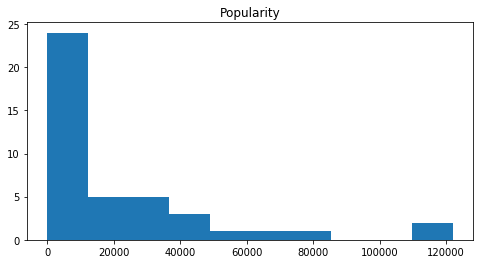

In [53]:
plt.subplots(figsize=(8, 4))
plt.hist(govtPop.popularity);
plt.title('Popularity');

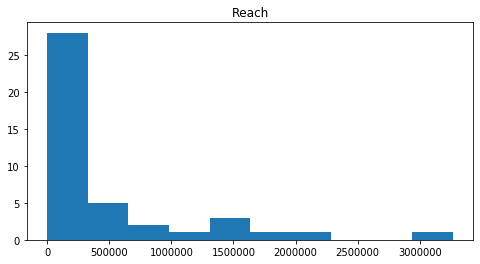

In [54]:
plt.subplots(figsize=(8, 4))
plt.hist(govtReach.reach);
plt.title('Reach');

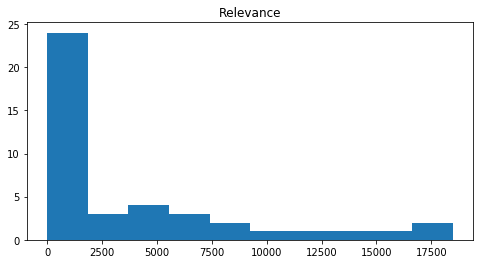

In [55]:
plt.subplots(figsize=(8, 4))
plt.hist(govtRelevance.relevance);
plt.title('Relevance');

>> From the above, there is no normal distribution.. 

>> hence we cannot just find the if there is a correlation among them (_pearon correlation works for normally ditributed data_), 

> To calcualte the correlation between these (sorted) data points:, 
- we have to make them ordinal by assigning rank to them 
- then use spearman correlation  to find the correlation coefficient between them 

In [56]:
govtPop.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance
26,247217109,Nana Akufo-Addo,NAkufoAddo,Official Twitter account of Nana Addo Dankwa A...,7090,352,1505330,3451,2,24,21,106152,15905,122057,1504978,15926
13,1164801318742982656,Abdalla Hamdok,SudanPMHamdok,The official account of the Prime Minister of ...,652,115,369867,329,1,1,7,102936,17078,120014,369752,17085


In [57]:
govtPop['ranking'] = [i+1 for i in range(len(govtPop.index))]
govtPop.head(1)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance,ranking
26,247217109,Nana Akufo-Addo,NAkufoAddo,Official Twitter account of Nana Addo Dankwa A...,7090,352,1505330,3451,2,24,21,106152,15905,122057,1504978,15926,1


In [58]:
govtReach['ranking'] = [i+1 for i in range(len(govtReach.index))]

In [59]:
govtReach.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance,ranking
32,2936714848,Muhammadu Buhari,MBuhari,This is the official account of Muhammadu Buha...,4734,26,3268955,2034,2,1,0,69304,14460,83764,3268929,14460,1
10,37601149,Paul Kagame,PaulKagame,"President of the Republic of Rwanda, write to:...",2861,181,1981754,4092,0,0,2,22794,5116,27910,1981573,5118,2


In [60]:
govtRelevance['ranking'] = [i+1 for i in range(len(govtRelevance.index))]

In [61]:
govtRelevance.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance,ranking
17,337183326,Amb. Willy Nyamitwe,willynyamitwe,Ambassador & Senior Advisor to HE @GeneralNeva...,40665,4654,107296,3287,12,135,354,6461,18140,24601,102642,18494,1
13,1164801318742982656,Abdalla Hamdok,SudanPMHamdok,The official account of the Prime Minister of ...,652,115,369867,329,1,1,7,102936,17078,120014,369752,17085,2


> Let's fimd the correlation coeeficient betweent these measure

>> Emphasis would be placed on the correlation between `popularity` & `relevance`

>> This is because reach which is measured by followership does not necessariy indicate influence

>> This would help us avoid the `million folower fallacy` discussed in the reserach paper link above

- correlation between reach and relevance

In [62]:
reach_rev_corr = pd.DataFrame(govtReach.reach.values.tolist(), govtRelevance.relevance.values.tolist()).reset_index()

In [63]:
reach_rev_corr=reach_rev_corr.rename(columns={'index':'reach', 0: 'relevance'})

In [64]:
reach_rev_corr.corr(method='spearman') 

,reach,relevance
reach,1.0,1.0
relevance,1.0,1.0


In [65]:
spearmanr(reach_rev_corr)

SpearmanrResult(correlation=1.0, pvalue=0.0)

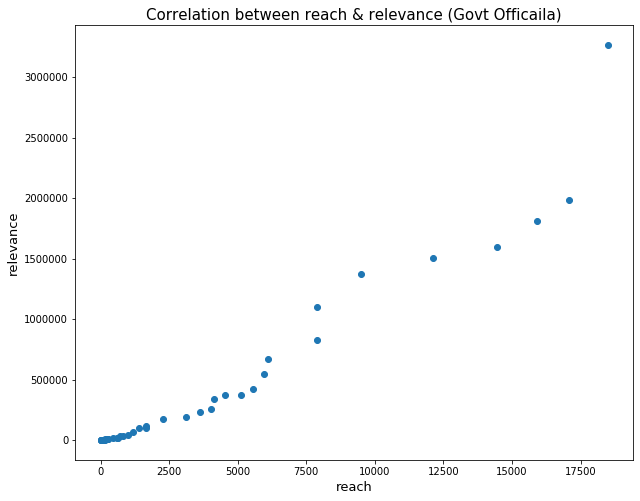

In [80]:
plt.subplots(figsize=(10,8))
plt.scatter(x=reach_rev_corr.reach, y=reach_rev_corr.relevance, marker='o')
plt.title('Correlation between reach & relevance (Govt Officaila)', fontsize=15)
plt.xlabel('reach', fontsize=13)
plt.ylabel('relevance', fontsize=13)
plt.savefig(fname='savedCharts/africaGovt/reach_rel_corrGov.png', format='png')
plt.show()

#### Interpretaion:

> From the above computed correation coefficent of `1.0` and scatter plot, we can deduce that:
 >> there is a strongly positive correlation between`reach` and `relevance` also they are strictly increasing

- correlation between reach and popularity

In [68]:
reach_pop_corr = pd.DataFrame(govtReach.reach.values.tolist(), govtPop.popularity.values.tolist()).reset_index()

In [69]:
reach_pop_corr=reach_pop_corr.rename(columns={'index':'reach', 0: 'popularity'})

In [72]:
reach_pop_corr.corr(method='spearman')

,reach,popularity
reach,1.0,1.0
popularity,1.0,1.0


In [73]:
spearmanr(reach_pop_corr) 

SpearmanrResult(correlation=1.0, pvalue=0.0)

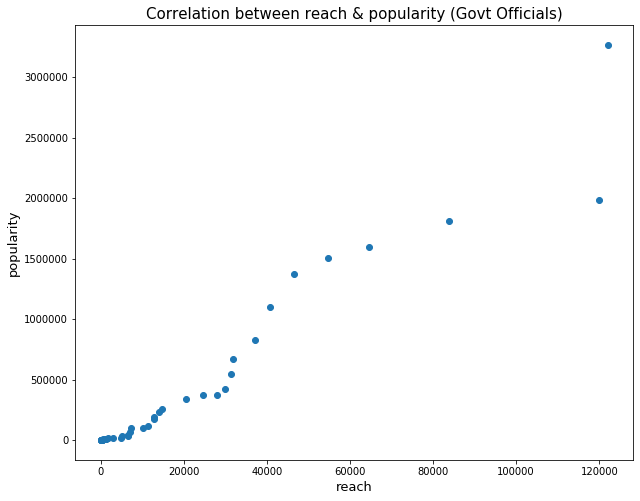

In [81]:
plt.subplots(figsize=(10,8))
plt.scatter(x=reach_pop_corr.reach, y=reach_pop_corr.popularity, marker='o')
plt.title('Correlation between reach & popularity (Govt Officials)', fontsize=15)
plt.xlabel('reach', fontsize=13)
plt.ylabel('popularity', fontsize=13)
plt.savefig(fname='savedCharts/africaGovt/reach_pop_corrGov.png', format='png')
plt.show() 

#### Interpretaion:

> From the above computed correation coefficent of `1.0` and scatter plot, we can deduce that:
 >> there is a strongly positive correlation between`relevance` and `popularity` also they are strictly increasing

- correlation between relevance and popularity

In [75]:
rev_pop_corr = pd.DataFrame(govtPop.popularity.values.tolist(), govtRelevance.relevance.values.tolist()).reset_index()

In [76]:
rev_pop_corr=rev_pop_corr.rename(columns={'index':'popularity', 0: 'relevance'})

In [77]:
rev_pop_corr.corr(method='spearman')

,popularity,relevance
popularity,1.0,1.0
relevance,1.0,1.0


In [78]:
spearmanr(reach_rev_corr)

SpearmanrResult(correlation=1.0, pvalue=0.0)

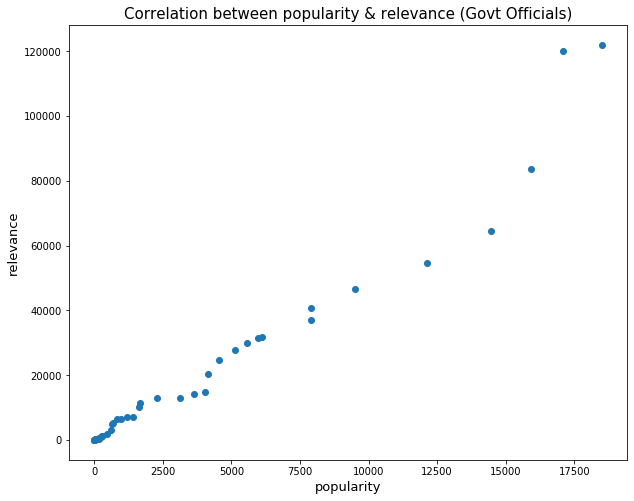

In [82]:
plt.subplots(figsize=(10,8)) 
plt.scatter(x=rev_pop_corr.popularity, y=rev_pop_corr.relevance, marker='o')
plt.title('Correlation between popularity & relevance (Govt Officials)', fontsize=15)
plt.xlabel('popularity', fontsize=13)  
plt.ylabel('relevance', fontsize=13)
plt.savefig(fname='savedCharts/africaGovt/pop_rev_corrGov.png', format='png')
plt.show() 

#### Interpretaion:

> From the above computed correation coefficent of `1.0` and scatter plot, we can deduce that:
 >> there is a strongly positive correlation between`reach` and `relevance` also they are strictly increasing

  --------------------------------------------------------------------------------------------------------------

### Top 10 Influnetial African Personalities/Brands

#### Find Correlation between theses measures of influence among African government

##### To perform statistical inferences like correlation, we need a gaussian data,
##### however, we can do the ffg in case of a non-gaussain data

> Sort govtResponse by:

>> Influential govt by popularity

>> Influential govt by reach

>> Influential govt by relevance

> Rank users : 
>> so that the rank of 1 indicates  the  most  influential  user  and  increasing  rank  indicates a less influential user.
>> Users with the same influence value receive the average of the rank amongst the

- Sort Values by each measure of Influence

In [83]:
afriqInfPop = afriqInfCopy.sort_values(by='popularity', axis=0, ascending=False)

In [84]:
afriqInfReach = afriqInfCopy.sort_values(by='reach', axis=0, ascending=False)

In [85]:
afriqInfRev = afriqInfCopy.sort_values(by='relevance', axis=0, ascending=False)

- Rank users

>> Before ranking, let's plot the distribution of each sorted data to observe whther there is a normal distribution (gaussian) or not

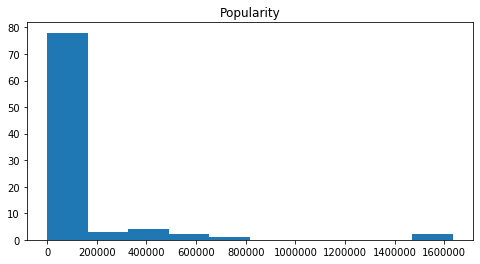

In [86]:
plt.subplots(figsize=(8, 4))
plt.hist(afriqInfPop.popularity);
plt.title('Popularity');

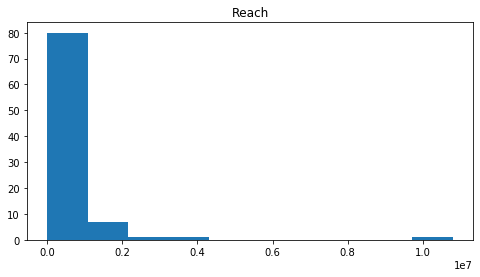

In [87]:
plt.subplots(figsize=(8, 4))
plt.hist(afriqInfReach.reach);
plt.title('Reach');

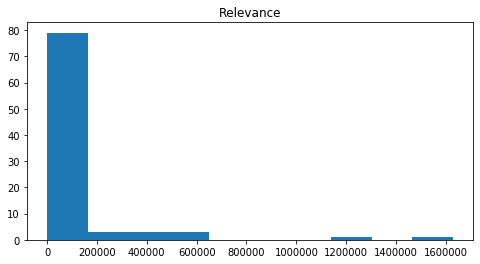

In [88]:
plt.subplots(figsize=(8, 4))
plt.hist(afriqInfRev.relevance);
plt.title('Relevance');

>> From the above, there is no normal distribution.. 

>> hence we cannot just find the if there is a correlation among them (_pearon correlation works for normally ditributed data_), 

> To calcualte the correlation between these (sorted) data points:, 
- we have to make them ordinal by assigning rank to them 
- then use spearman correlation  to find the correlation coefficient between them 

In [89]:
afriqInfPop.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance
16,18753586,Barry Malone,malonebarry,"Executive Producer, @AJStream. Previously: Al ...",35230,2988,28426,4208,8,43,767,7317,1627597,1634914,25438,1628364
55,454904118,Mbuyiseni Ndlozi,MbuyiseniNdlozi,EFF Commissar & Member of Parliament - @EFFSou...,35927,5473,1074551,3116,11,178,861,328509,1183406,1511915,1069078,1184267


In [90]:
afriqInfPop['ranking'] = [i+1 for i in range(len(afriqInfPop.index))]
afriqInfCopy.head(1)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance
0,305125998,Jeffrey Gettleman,gettleman,South Asia bureau chief for the New York Times...,3770,37,25700,3340,1,5,38,268,111152,111420,25663,111190


In [91]:
afriqInfReach['ranking'] = [i+1 for i in range(len(afriqInfReach.index))]

In [92]:
afriqInfReach.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance,ranking
92,46335511,Trevor Noah,Trevornoah,Comedian from South Africa. I was in the crowd...,11185,325,10803194,4054,2,0,13,136346,592755,729101,10802869,592768,1
89,14697575,News24,News24,South Africa's premier online news resource. F...,322655,631,3575424,4453,72,227,1022,204918,89815,294733,3574793,90837,2


In [93]:
afriqInfRev['ranking'] = [i+1 for i in range(len(afriqInfRev.index))]

In [94]:
afriqInfRev.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance,ranking
16,18753586,Barry Malone,malonebarry,"Executive Producer, @AJStream. Previously: Al ...",35230,2988,28426,4208,8,43,767,7317,1627597,1634914,25438,1628364,1
55,454904118,Mbuyiseni Ndlozi,MbuyiseniNdlozi,EFF Commissar & Member of Parliament - @EFFSou...,35927,5473,1074551,3116,11,178,861,328509,1183406,1511915,1069078,1184267,2


> Let's fimd the correlation coeeficient betweent these measure

>> Emphasis would be placed on the correlation between `popularity` & `relevance`

>> This is because reach which is measured by followership does not necessariy indicate influence

>> This would help us avoid the `million folower fallacy` discussed in the reserach paper link above

- correlation between reach and relevance

In [95]:
Infreach_rev_corr = pd.DataFrame(afriqInfReach.reach.values.tolist(), afriqInfRev.relevance.values.tolist()).reset_index()

In [96]:
Infreach_rev_corr=Infreach_rev_corr.rename(columns={'index':'reach', 0: 'relevance'})

In [97]:
Infreach_rev_corr.corr(method='spearman') 

,reach,relevance
reach,1.000000,0.999992
relevance,0.999992,1.000000


In [98]:
spearmanr(Infreach_rev_corr)

SpearmanrResult(correlation=0.9999917684972155, pvalue=2.849648624460546e-212)

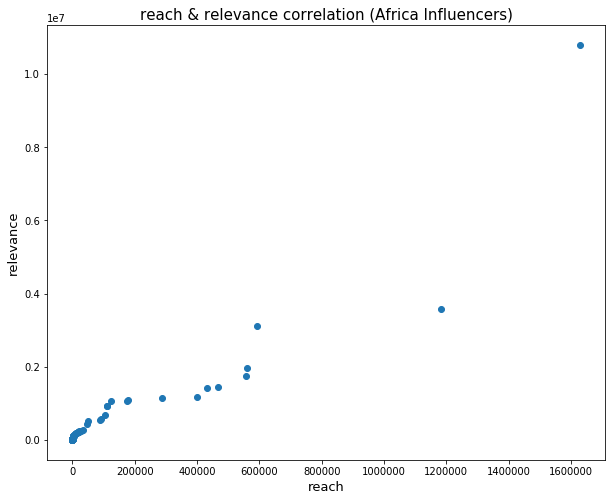

In [99]:
plt.subplots(figsize=(10,8))
plt.scatter(x=Infreach_rev_corr.reach, y=Infreach_rev_corr.relevance, marker='o')
plt.title('reach & relevance correlation (Africa Influencers)', fontsize=15)
plt.xlabel('reach', fontsize=13)
plt.ylabel('relevance', fontsize=13)
plt.savefig(fname='savedCharts/africaInfluencers/Infreach_rel_corr.png', format='png')
plt.show()

#### Interpretaion:

> From the above computed correation coefficent of `0.9` and scatter plot, we can deduce that:
 >> there is a strongly positive correlation between`reach` and `relevance` but not strictly increasing

- correlation between reach and popularity

In [100]:
Infreach_pop_corr = pd.DataFrame(afriqInfReach.reach.values.tolist(), afriqInfPop.popularity.values.tolist()).reset_index()

In [101]:
Infreach_pop_corr=Infreach_pop_corr.rename(columns={'index':'reach', 0: 'popularity'})

In [102]:
Infreach_pop_corr.corr(method='spearman')

,reach,popularity
reach,1.000000,0.999988
popularity,0.999988,1.000000


In [103]:
spearmanr(Infreach_pop_corr) 

SpearmanrResult(correlation=0.9999876527204139, pvalue=1.5951754558735378e-204)

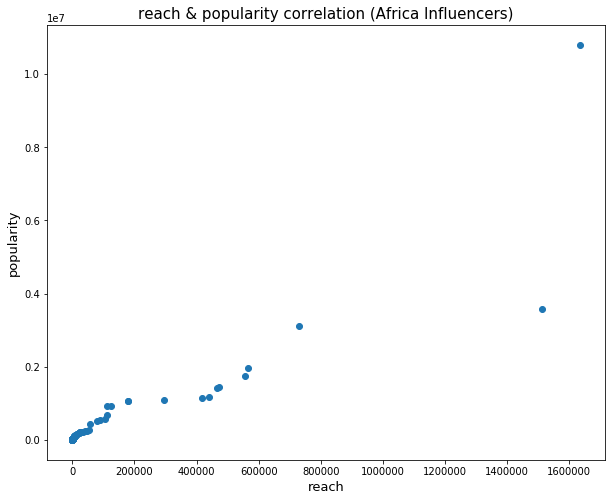

In [104]:
plt.subplots(figsize=(10,8))
plt.scatter(x=Infreach_pop_corr.reach, y=Infreach_pop_corr.popularity, marker='o')
plt.title('reach & popularity correlation (Africa Influencers)', fontsize=15)
plt.xlabel('reach', fontsize=13)
plt.ylabel('popularity', fontsize=13)
plt.savefig(fname='savedCharts/africaInfluencers/Infreach_pop_corr.png', format='png')
plt.show() 

#### Interpretaion:

> From the above computed correation coefficent of `0.9` and scatter plot, we can deduce that:
 >> there is a strongly positive correlation between`reach` and `popularity` but not strictly increasing

- correlation between relevance and popularity

In [105]:
Infrev_pop_corr = pd.DataFrame(afriqInfPop.popularity.values.tolist(), afriqInfRev.relevance.values.tolist()).reset_index()

In [106]:
Infrev_pop_corr=Infrev_pop_corr.rename(columns={'index':'popularity', 0: 'relevance'})

In [107]:
Infrev_pop_corr.corr(method='spearman')

,popularity,relevance
popularity,1.000000,0.999975
relevance,0.999975,1.000000


In [108]:
spearmanr(Infrev_pop_corr)

SpearmanrResult(correlation=0.9999753050935641, pvalue=2.807270424318346e-191)

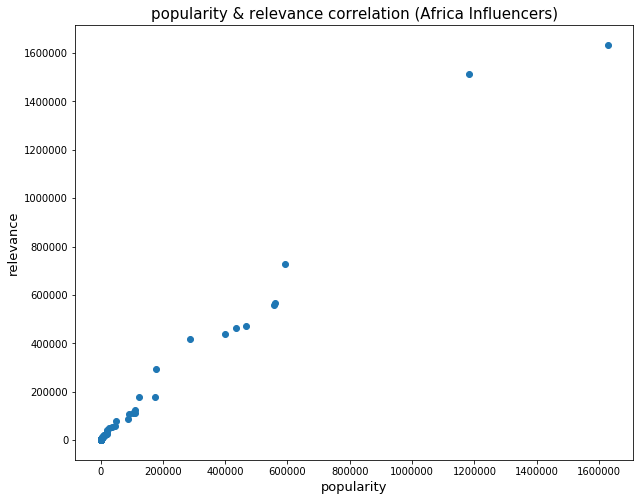

In [109]:
plt.subplots(figsize=(10,8)) 
plt.scatter(x=Infrev_pop_corr.popularity, y=Infrev_pop_corr.relevance, marker='o')
plt.title('popularity & relevance correlation (Africa Influencers)', fontsize=15)
plt.xlabel('popularity', fontsize=13)  
plt.ylabel('relevance', fontsize=13)
plt.savefig(fname='savedCharts/africaInfluencers/Infpop_rev_corr.png', format='png')
plt.show() 

#### Interpretaion:

> From the above computed correation coefficent of `0.9` and scatter plot, we can deduce that:
 >> there is a strongly positive correlation between`popularity` and `relevance` but they are not strictly increasing

#### Top ten Influential Governemnt in Africa across board

> Popularity

In [110]:
mostPopularGovt = govtPop[['name', 'screen_name', 'popularity', 'ranking']].head(10)
mostPopularGovt

,name,screen_name,popularity,ranking
26,Nana Akufo-Addo,NAkufoAddo,122057,1
13,Abdalla Hamdok,SudanPMHamdok,120014,2
32,Muhammadu Buhari,MBuhari,83764,3
15,Yoweri K Museveni,KagutaMuseveni,64678,4
33,Macky Sall,Macky_Sall,54732,5
39,Abiy Ahmed Ali 🇪🇹,AbiyAhmedAli,46599,6
24,Alassane Ouattara,AOuattara_PRCI,40757,7
4,Presidency | South Africa 🇿🇦,PresidencyZA,37143,8
19,Présidence RDC 🇨🇩,Presidence_RDC,31853,9
6,President of Zimbabwe,edmnangagwa,31427,10


/home/patrick/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127466 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/patrick/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/patrick/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/patrick/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/patrick/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/patrick/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: R

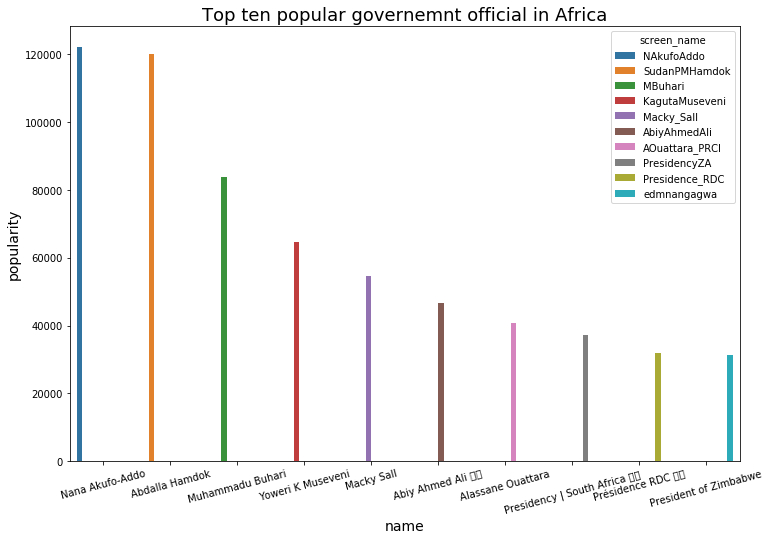

In [123]:
plt.subplots(figsize=(12,8))
sns.barplot(x='name', y='popularity', data=mostPopularGovt, hue='screen_name')
plt.xticks(rotation=15)
plt.title('Top ten popular governemnt official in Africa', fontsize=18)
plt.xlabel('name', fontsize=14)
plt.ylabel('popularity', fontsize=14)
plt.savefig(fname='savedCharts/africaGovt/mostPopularGovt.png', format='png')
plt.show() 

> Reach

In [124]:
mostReachedGovt = govtReach[['name', 'screen_name', 'reach', 'ranking']].head(10)
mostReachedGovt

,name,screen_name,reach,ranking
32,Muhammadu Buhari,MBuhari,3268929,1
10,Paul Kagame,PaulKagame,1981573,2
15,Yoweri K Museveni,KagutaMuseveni,1810509,3
4,Presidency | South Africa 🇿🇦,PresidencyZA,1597646,4
26,Nana Akufo-Addo,NAkufoAddo,1504978,5
33,Macky Sall,Macky_Sall,1373434,6
9,State House Kenya,StateHouseKenya,1102458,7
24,Alassane Ouattara,AOuattara_PRCI,830659,8
40,President Paul BIYA,PR_Paul_BIYA,673920,9
6,President of Zimbabwe,edmnangagwa,545460,10


/home/patrick/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/patrick/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/patrick/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 127487 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/patrick/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0, flags=flags)


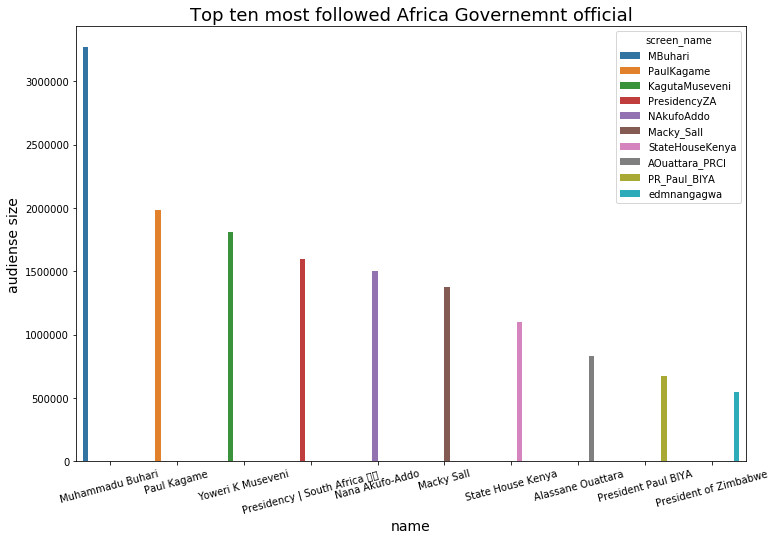

In [125]:
plt.subplots(figsize=(12,8))
sns.barplot(x='name', y='reach', data=mostReachedGovt, hue='screen_name')
plt.xticks(rotation=15)
plt.title('Top ten most followed Africa Governemnt official', fontsize=18)
plt.xlabel('name', fontsize=14)
plt.ylabel('audiense size', fontsize=14)
plt.savefig(fname='savedCharts/africaGovt/mostReachedGovt.png', format='png')
plt.show() 

> Relevance

In [126]:
mostRelevantGovt = govtRelevance[['name', 'screen_name', 'relevance', 'ranking']].head(10)
mostRelevantGovt

,name,screen_name,relevance,ranking
17,Amb. Willy Nyamitwe,willynyamitwe,18494,1
13,Abdalla Hamdok,SudanPMHamdok,17085,2
26,Nana Akufo-Addo,NAkufoAddo,15926,3
32,Muhammadu Buhari,MBuhari,14460,4
4,Presidency | South Africa 🇿🇦,PresidencyZA,12113,5
14,TanzaniaSpokesperson,TZSpokesperson,9493,6
15,Yoweri K Museveni,KagutaMuseveni,7894,7
33,Macky Sall,Macky_Sall,7883,8
6,President of Zimbabwe,edmnangagwa,6099,9
9,State House Kenya,StateHouseKenya,5961,10


/home/patrick/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/patrick/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/patrick/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 127487 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/patrick/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0, flags=flags)


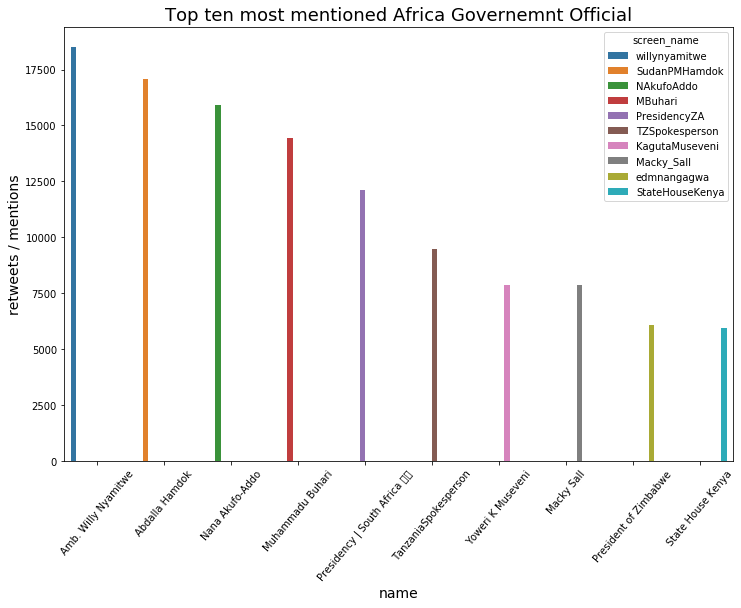

In [127]:
plt.subplots(figsize=(12,8))
sns.barplot(x='name', y='relevance', data=mostRelevantGovt, hue='screen_name')
plt.xticks(rotation=50)
plt.title('Top ten most mentioned Africa Governemnt Official', fontsize=18)
plt.xlabel('name', fontsize=14)
plt.ylabel('retweets / mentions', fontsize=14)
plt.savefig(fname='savedCharts/africaGovt/mostRelevantGovt.png', format='png')
plt.show() 

> Who are the most Influential Goverment Official in Africa accross board

In [139]:
popularGovt = set(mostPopularGovt.name)
reachedGovt = set(mostReachedGovt.name)
relevantGovt = set (mostRelevantGovt.name)

In [141]:
mostInfluentialGovt = popularGovt.intersection(reachedGovt).intersection(relevantGovt)

In [142]:
mostInfluentialGovt

{'Macky Sall',
 'Muhammadu Buhari',
 'Nana Akufo-Addo',
 'Presidency | South Africa 🇿🇦',
 'President of Zimbabwe',
 'Yoweri K Museveni'}

>> Word Cloud of Most Influential African Govt Officials on Twitter

In [266]:
mostInfluentialGovt = {'Macky_Sall ',
 'Muhammadu_Buhari ',
 'Nana_Akufo_Addo ',
 'Presidency_South_Africa ',
 'President_of_Zimbabwe ',
 'Yoweri_K_Museveni '}

In [267]:
df = pd.DataFrame(mostInfluentialGovt, columns=['most_influential'])
df

,most_influential
0,Presidency_South_Africa
1,President_of_Zimbabwe
2,Muhammadu_Buhari
3,Nana_Akufo_Addo
4,Macky_Sall
5,Yoweri_K_Museveni


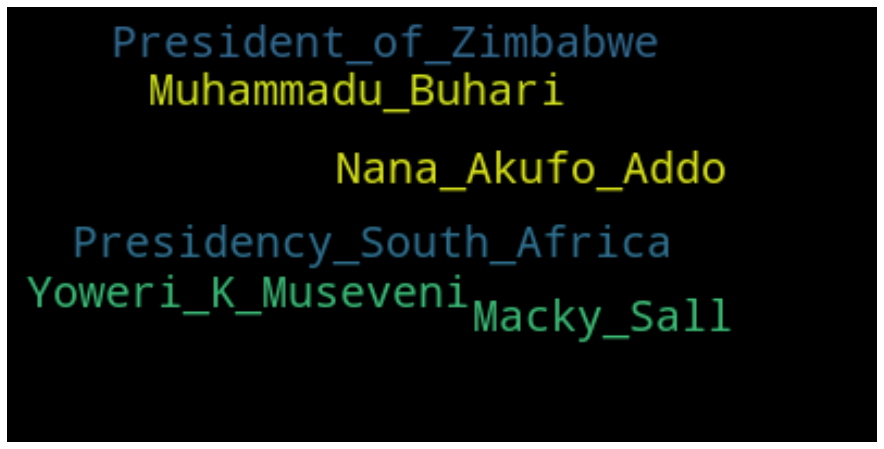

In [268]:
text = "".join(name for name in df.most_influential)

wordcloud = WordCloud(max_font_size=20, max_words=10, background_color="black").generate(text)
plt.figure(figsize=(20,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
wordcloud.to_file("savedCharts/africaGovt/mostInfluentialGovt.png")
plt.show()

In [269]:
africa = np.array(Image.open("savedCharts/africaGovt/africa.png"))

In [270]:
africa

array([[ 4,  4,  4, ...,  3,  3,  3],
       [ 4,  4,  4, ...,  3,  3,  3],
       [ 1,  4,  4, ...,  3,  3,  3],
       ...,
       [ 4,  7,  4, ..., 10, 10, 10],
       [ 1,  4,  4, ...,  3,  3,  3],
       [ 4,  1,  1, ...,  3,  3,  3]], dtype=uint8)

In [271]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [272]:
# Transform your mask into a new one that will work with the function:
transformed_africa = np.ndarray((africa.shape[0],africa.shape[1]), np.int32)

for i in range(len(africa)):
    transformed_africa[i] = list(map(transform_format, africa[i]))

In [273]:
transformed_africa

array([[ 4,  4,  4, ...,  3,  3,  3],
       [ 4,  4,  4, ...,  3,  3,  3],
       [ 1,  4,  4, ...,  3,  3,  3],
       ...,
       [ 4,  7,  4, ..., 10, 10, 10],
       [ 1,  4,  4, ...,  3,  3,  3],
       [ 4,  1,  1, ...,  3,  3,  3]], dtype=int32)

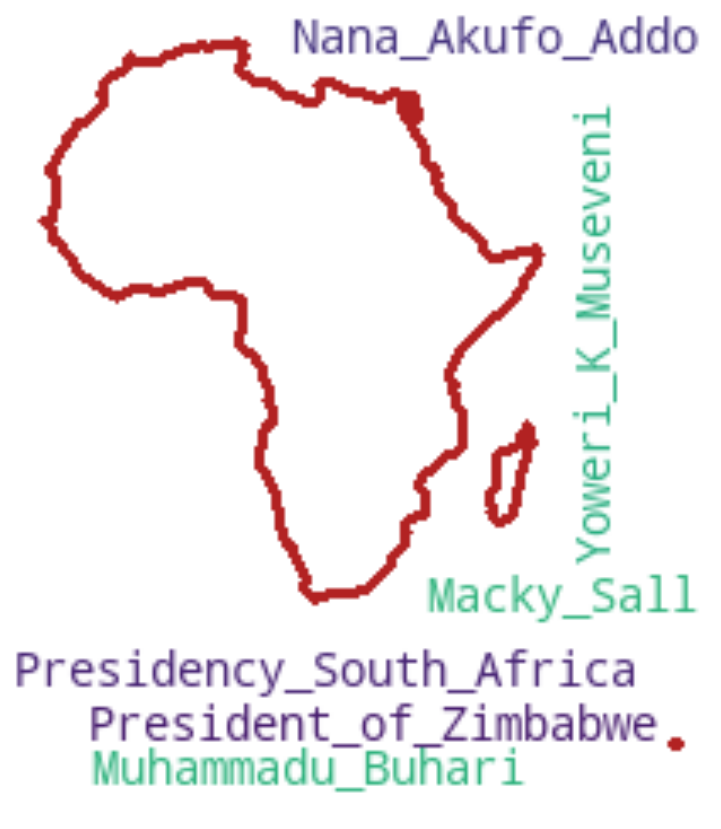

In [281]:
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_africa,
              contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("savedCharts/africaGovt/mostInfluentialGovt.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Top ten Influencers in Africa across board

> Popularity

In [282]:
mostPopularInf = afriqInfPop[['name', 'screen_name', 'popularity', 'ranking']].head(10)
mostPopularInf

,name,screen_name,popularity,ranking
16,Barry Malone,malonebarry,1634914,1
55,Mbuyiseni Ndlozi,MbuyiseniNdlozi,1511915,2
92,Trevor Noah,Trevornoah,729101,3
84,Loyiso Gola,loyisogola,566351,4
64,Jendayi E Frazer,JendayiFrazer,557712,5
30,Rebecca Enonchong,africatechie,471808,6
88,Julius Sello Malema,Julius_S_Malema,464563,7
59,Geoffrey York,geoffreyyork,440079,8
2,Scapegoat,AndiMakinana,417561,9
89,News24,News24,294733,10


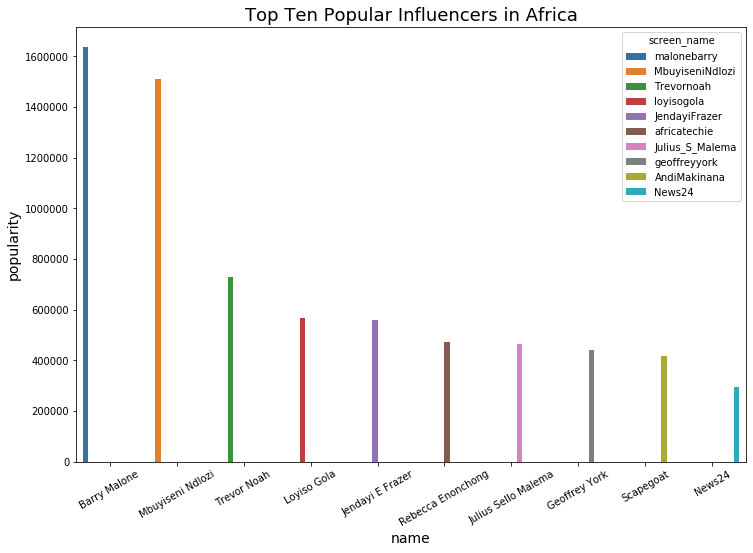

In [283]:
plt.subplots(figsize=(12,8))
sns.barplot(x='name', y='popularity', data=mostPopularInf, hue='screen_name')
plt.xticks(rotation=30)
plt.title('Top Ten Popular Influencers in Africa', fontsize=18)
plt.xlabel('name', fontsize=14)
plt.ylabel('popularity', fontsize=14)
plt.savefig(fname='savedCharts/africaInfluencers/mostPopularInf.png', format='png')
plt.show()

> Reach

In [284]:
mostReachedInf = afriqInfReach[['name', 'screen_name', 'reach', 'ranking']].head(10)
mostReachedInf

,name,screen_name,reach,ranking
92,Trevor Noah,Trevornoah,10802869,1
89,News24,News24,3574793,2
88,Julius Sello Malema,Julius_S_Malema,3125594,3
91,Gareth Cliff,GarethCliff,1974120,4
79,Euphonik™♛,euphonik,1754206,5
87,Helen Zille,helenzille,1440916,6
82,MTV Base Africa,MTVBaseAfrica,1415474,7
85,5FM,5FM,1163787,8
81,Cricket South Africa,OfficialCSA,1157686,9
84,Loyiso Gola,loyisogola,1081210,10


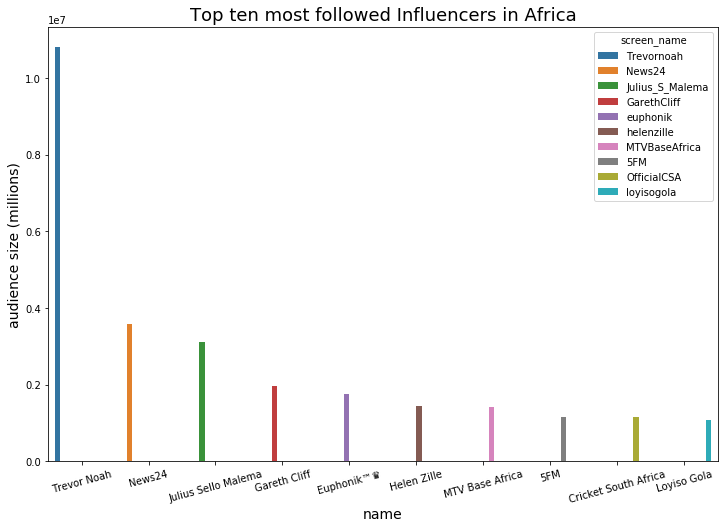

In [285]:
plt.subplots(figsize=(12,8))
sns.barplot(x='name', y='reach', data=mostReachedInf, hue='screen_name')
plt.xticks(rotation=15)
plt.title('Top ten most followed Influencers in Africa', fontsize=18)
plt.xlabel('name', fontsize=14)
plt.ylabel('audience size (millions)', fontsize=14)
plt.savefig(fname='savedCharts/africaInfluencers/mostFollowedInf.png', format='png')
plt.show() 

> Relevance

In [286]:
mostRelevantInf = afriqInfRev[['name', 'screen_name', 'relevance', 'ranking']].head(10)
mostRelevantInf

,name,screen_name,relevance,ranking
16,Barry Malone,malonebarry,1628364,1
55,Mbuyiseni Ndlozi,MbuyiseniNdlozi,1184267,2
92,Trevor Noah,Trevornoah,592768,3
84,Loyiso Gola,loyisogola,560281,4
64,Jendayi E Frazer,JendayiFrazer,557720,5
30,Rebecca Enonchong,africatechie,465908,6
59,Geoffrey York,geoffreyyork,433433,7
2,Scapegoat,AndiMakinana,398721,8
88,Julius Sello Malema,Julius_S_Malema,287231,9
24,Kate Forbes,forbeesta,179298,10


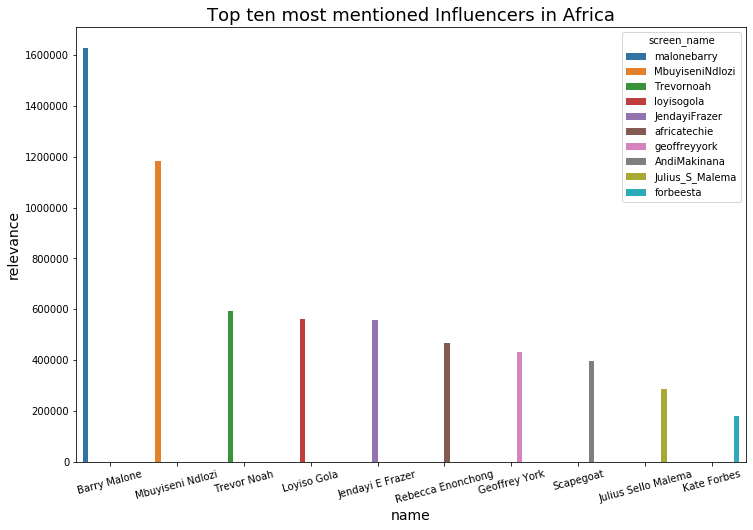

In [287]:
plt.subplots(figsize=(12,8))
sns.barplot(x='name', y='relevance', data=mostRelevantInf, hue='screen_name')
plt.xticks(rotation=15)
plt.title('Top ten most mentioned Influencers in Africa', fontsize=18)
plt.xlabel('name', fontsize=14)
plt.ylabel('relevance', fontsize=14)
plt.savefig(fname='savedCharts/africaInfluencers/mostRelevantInf.png', format='png')
plt.show() 

> Who are the most Influential Perosnality/Brands in Africa accross board

In [288]:
popularInf = set(mostPopularInf.name)
reachedInf = set(mostReachedInf.name)
relevantInf = set (mostRelevantInf.name)

In [289]:
mostInfluentialInf = popularInf.intersection(reachedInf).intersection(relevantInf)

In [290]:
mostInfluentialInf

{'Julius Sello Malema', 'Loyiso Gola', 'Trevor Noah'}

>> Word Cloud of Most Influential African Govt Officials on Twitter

In [291]:
mostInfluentialInf = {'Julius_Sello_Malema ', 'Loyiso_Gola ', 'Trevor_Noah '}

In [292]:
df = pd.DataFrame(mostInfluentialInf, columns=['most_influential'])
df

,most_influential
0,Loyiso_Gola
1,Julius_Sello_Malema
2,Trevor_Noah


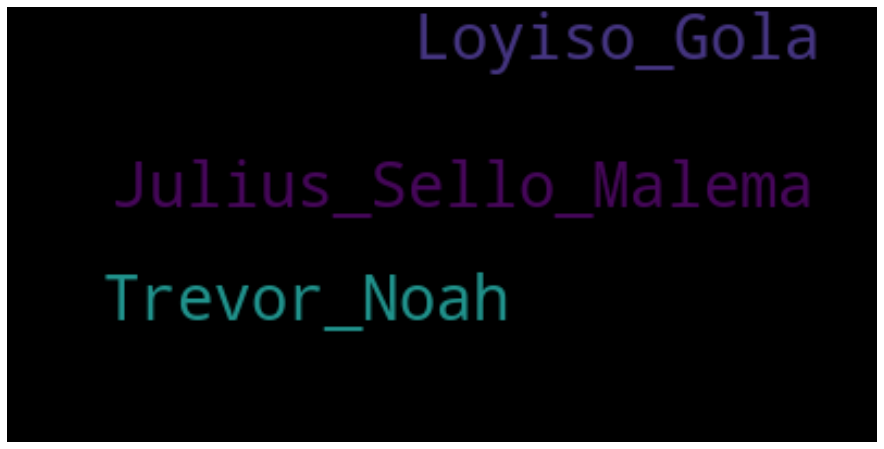

In [296]:
text = "".join(name for name in df.most_influential)

wordcloud = WordCloud(max_font_size=30, max_words=10, background_color="black").generate(text)
plt.figure(figsize=(20,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
wordcloud.to_file("savedCharts/africaGovt/mostInfluentialGovt.png")
plt.show()

In [297]:
africa = np.array(Image.open("savedCharts/africaGovt/africa.png"))

In [298]:
africa

array([[ 4,  4,  4, ...,  3,  3,  3],
       [ 4,  4,  4, ...,  3,  3,  3],
       [ 1,  4,  4, ...,  3,  3,  3],
       ...,
       [ 4,  7,  4, ..., 10, 10, 10],
       [ 1,  4,  4, ...,  3,  3,  3],
       [ 4,  1,  1, ...,  3,  3,  3]], dtype=uint8)

In [299]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [300]:
# Transform your mask into a new one that will work with the function:
transformed_africa = np.ndarray((africa.shape[0],africa.shape[1]), np.int32)

for i in range(len(africa)):
    transformed_africa[i] = list(map(transform_format, africa[i]))

In [301]:
transformed_africa

array([[ 4,  4,  4, ...,  3,  3,  3],
       [ 4,  4,  4, ...,  3,  3,  3],
       [ 1,  4,  4, ...,  3,  3,  3],
       ...,
       [ 4,  7,  4, ..., 10, 10, 10],
       [ 1,  4,  4, ...,  3,  3,  3],
       [ 4,  1,  1, ...,  3,  3,  3]], dtype=int32)

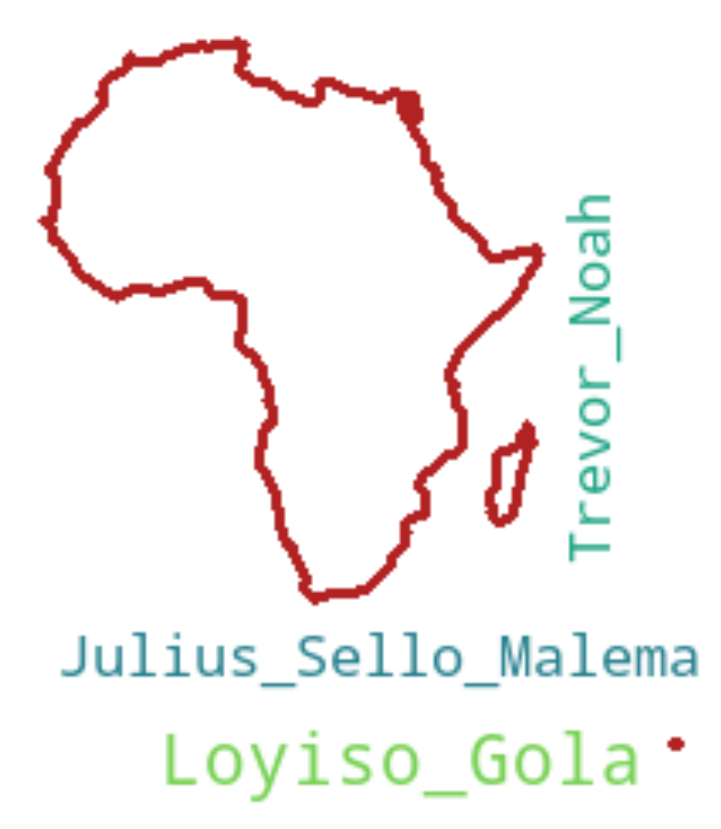

In [303]:
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_africa,
              contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("savedCharts/africaGovt/mostInfluentialInf.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<a id="r2"></a>

#### Research Question 2: 

> '''

<a id="r3"></a>


#### Research Question 3: 
> '''

<a id="gi"><gi/>

### General Insights

<a id="rc"><rc/>

### Recommendations & Conclusions

<a id="lim"><lim/>

### Limitations


<a id="ref"><ref/>
### References 


- Spearman Rank Correlation Coefficient

https://towardsdatascience.com/discover-the-strength-of-monotonic-relation-850d11f72046

https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/ 

<a href="#top">Back to top</a>

In [ ]:
status = tweet if 'extended_tweet' in status._json: status_json = status._json['extended_tweet']['full_text'] elif 'retweeted_status' in status._json and 'extended_tweet' in status._json['retweeted_status']: status_json = status._json['retweeted_status']['extended_tweet']['full_text'] elif 'retweeted_status' in status._json: status_json = status._json['retweeted_status']['full_text'] else: status_json = status._json['full_text'] print(status_json)'